In [1]:
from mpl_toolkits.mplot3d import Axes3D
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt # plotting
import numpy as np # linear algebra
import os # accessing directory structure
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import seaborn as sns

In [2]:
# Distribution graphs (histogram/bar graph) of column data
def plotPerColumnDistribution(df, nGraphShown, nGraphPerRow):
    nunique = df.nunique()
    df = df[[col for col in df if nunique[col] > 1 and nunique[col] < 50]] # For displaying purposes, pick columns that have between 1 and 50 unique values
    nRow, nCol = df.shape
    print(nRow, nCol)
    columnNames = list(df)
    print(columnNames)
    nGraphRow = int((nCol + nGraphPerRow - 1) / nGraphPerRow)
    print(nCol, nGraphPerRow, nGraphPerRow, nGraphRow)
    plt.figure(num = None, figsize = (6 * nGraphPerRow, 8 * nGraphRow), dpi = 80, facecolor = 'w', edgecolor = 'k')
    for i in range(min(nCol, nGraphShown)):
        plt.subplot(nGraphRow, nGraphPerRow, i + 1)
        columnDf = df.iloc[:, i]
        if (not np.issubdtype(type(columnDf.iloc[0]), np.number)):
            valueCounts = columnDf.value_counts()
            valueCounts.plot.bar()
        else:
            columnDf.hist()
        plt.ylabel('counts')
        plt.xticks(rotation = 90)
        plt.title(f'{columnNames[i]} (column {i})')
    plt.tight_layout(pad = 1.0, w_pad = 1.0, h_pad = 1.0)
    plt.show()

In [3]:
# Correlation matrix
def plotCorrelationMatrix(df, graphWidth):
    filename = df.dataframeName
    df = df.dropna(axis=1) # drop columns with NaN
    df = df[[col for col in df if df[col].nunique() > 1]] # keep columns where there are more than 1 unique values
    if df.shape[1] < 2:
        print(f'No correlation plots shown: The number of non-NaN or constant columns ({df.shape[1]}) is less than 2')
        return
    corr = df.corr(numeric_only=True)
    plt.figure(num=None, figsize=(graphWidth, graphWidth), dpi=80, facecolor='w', edgecolor='k')
    corrMat = plt.matshow(corr, fignum = 1)
    plt.xticks(range(len(corr.columns)), corr.columns, rotation=90)
    plt.yticks(range(len(corr.columns)), corr.columns)
    plt.gca().xaxis.tick_bottom()
    plt.colorbar(corrMat)
    plt.title(f'Correlation Matrix for {filename}', fontsize=15)
    plt.show()

In [4]:
# Scatter and density plots
def plotScatterMatrix(df, plotSize, textSize):
    df = df.select_dtypes(include =[np.number]) # keep only numerical columns
    # Remove rows and columns that would lead to df being singular
    df = df.dropna(axis=1)
    df = df[[col for col in df if df[col].nunique() > 1]] # keep columns where there are more than 1 unique values
    columnNames = list(df)
    if len(columnNames) > 10: # reduce the number of columns for matrix inversion of kernel density plots
        columnNames = columnNames[:10]
    df = df[columnNames]
    ax = pd.plotting.scatter_matrix(df, alpha=0.75, figsize=[plotSize, plotSize], diagonal='kde')
    corrs = df.corr().values
    for i, j in zip(*plt.np.triu_indices_from(ax, k = 1)):
        ax[i, j].annotate('Corr. coef = %.3f' % corrs[i, j], (0.8, 0.2), xycoords='axes fraction', ha='center', va='center', size=textSize)
    plt.suptitle('Scatter and Density Plot')
    plt.show()

In [5]:
# nRowsRead = 1000 # specify 'None' if want to read whole file
# df1 = pd.read_csv('dataset/supermarket_sales - Sheet1.csv', delimiter=',', nrows = nRowsRead)
df = pd.read_csv('dataset/superstore_sales.csv')
df.dataframeName = 'superstore_sales'
nRow, nCol = df.shape
print(f'There are {nRow} rows and {nCol} columns')

There are 9800 rows and 18 columns


In [6]:
df.describe()

,Row ID,Postal Code,Sales
count,9800.000000,9789.000000,9800.000000
mean,4900.500000,55273.322403,230.769059
std,2829.160653,32041.223413,626.651875
min,1.000000,1040.000000,0.444000
25%,2450.750000,23223.000000,17.248000
50%,4900.500000,58103.000000,54.490000
75%,7350.250000,90008.000000,210.605000
max,9800.000000,99301.000000,22638.480000


In [7]:
df.head(5)

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,State,Postal Code,Region,Product ID,Category,Sub-Category,Product Name,Sales
0,1,CA-2017-152156,08/11/2017,11/11/2017,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,Kentucky,42420.0,South,FUR-BO-10001798,Furniture,Bookcases,Bush Somerset Collection Bookcase,261.9600
1,2,CA-2017-152156,08/11/2017,11/11/2017,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,Kentucky,42420.0,South,FUR-CH-10000454,Furniture,Chairs,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",731.9400
2,3,CA-2017-138688,12/06/2017,16/06/2017,Second Class,DV-13045,Darrin Van Huff,Corporate,United States,Los Angeles,California,90036.0,West,OFF-LA-10000240,Office Supplies,Labels,Self-Adhesive Address Labels for Typewriters b...,14.6200
3,4,US-2016-108966,11/10/2016,18/10/2016,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,Florida,33311.0,South,FUR-TA-10000577,Furniture,Tables,Bretford CR4500 Series Slim Rectangular Table,957.5775
4,5,US-2016-108966,11/10/2016,18/10/2016,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,Florida,33311.0,South,OFF-ST-10000760,Office Supplies,Storage,Eldon Fold 'N Roll Cart System,22.3680


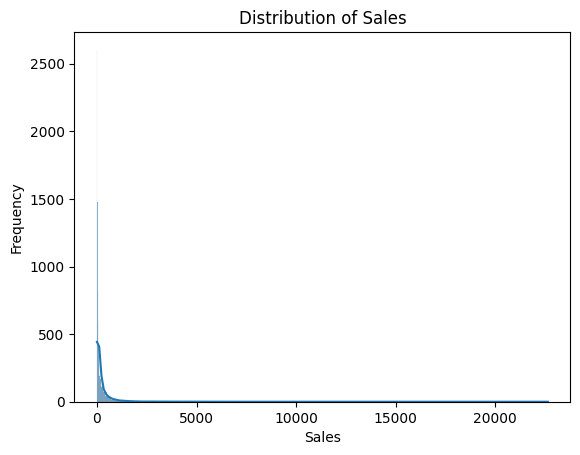

In [8]:
# Plotting the distribution of 'Sales'
sns.histplot(df['Sales'], kde=True)

# Adding titles and labels
plt.title('Distribution of Sales')
plt.xlabel('Sales')
plt.ylabel('Frequency')

# Display the plot
plt.show()

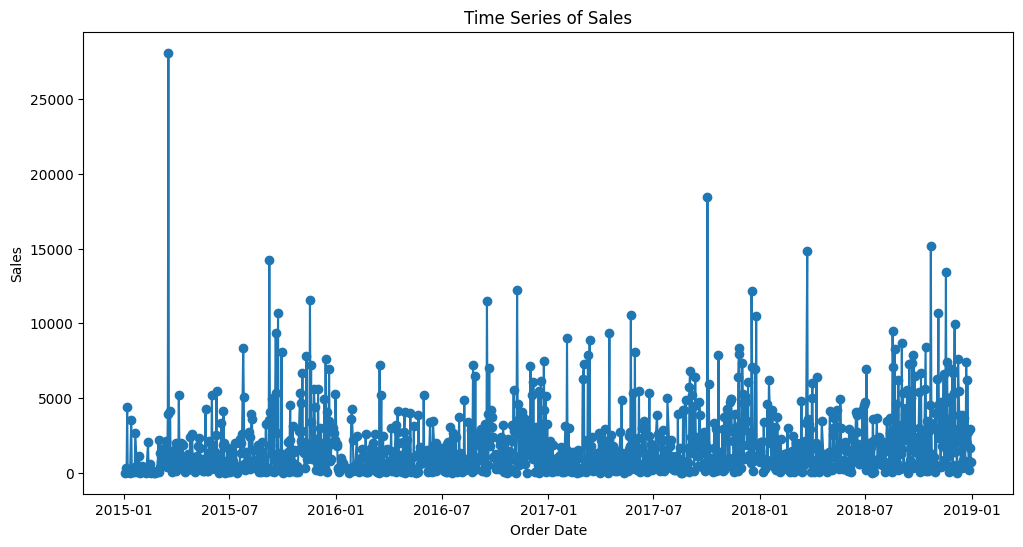

In [9]:
# Ensure 'Order Date' is in datetime format
df['Order Date'] = pd.to_datetime(df['Order Date'], format='%d/%m/%Y')

# Group by 'Order Date' and sum the sales
sales_over_time = df.groupby('Order Date')['Sales'].sum()

# Plotting the time series
plt.figure(figsize=(12,6))
plt.plot(sales_over_time, marker='o', linestyle='-')

# Adding titles and labels
plt.title('Time Series of Sales')
plt.xlabel('Order Date')
plt.ylabel('Sales')

# Display the plot
plt.show()

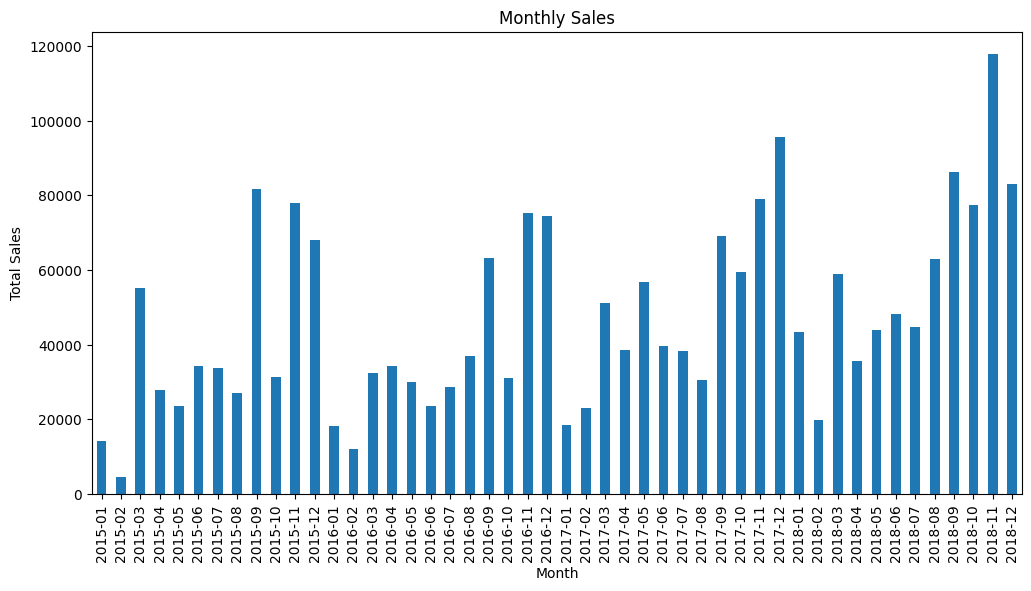

In [10]:
# Convert 'Order Date' to datetime if not already done
df['Order Date'] = pd.to_datetime(df['Order Date'], format='%d/%m/%Y')

# Extract the month and create a new column
df['Order Month'] = df['Order Date'].dt.to_period('M')

# Group by 'Order Month' and sum the sales
monthly_sales = df.groupby('Order Month')['Sales'].sum()

# Plotting the time series of monthly sales
plt.figure(figsize=(12, 6))
monthly_sales.plot(kind='bar')

# Adding titles and labels
plt.title('Monthly Sales')
plt.xlabel('Month')
plt.ylabel('Total Sales')

# Display the plot
plt.show()


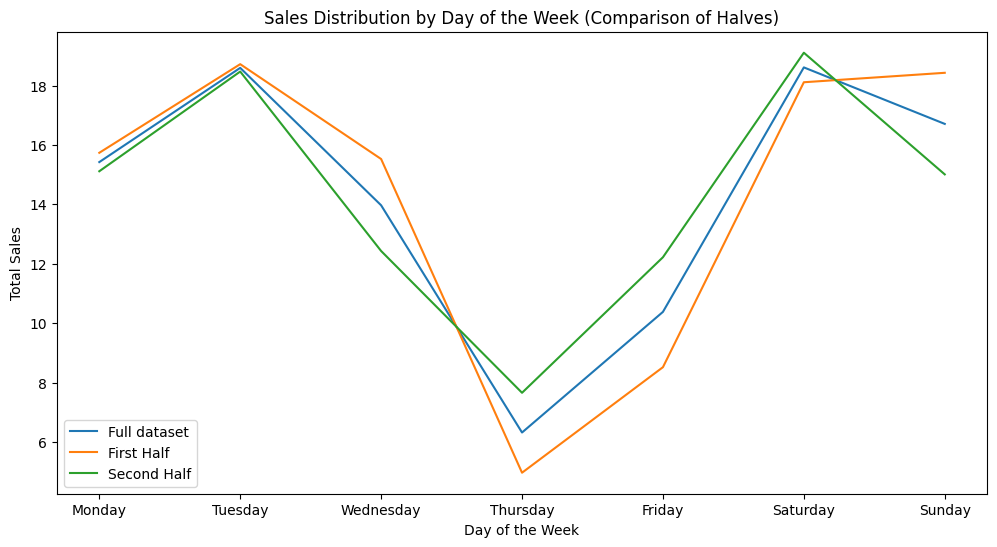

In [11]:
# Ensure 'Order Date' is a datetime object
df['Order Date'] = pd.to_datetime(df['Order Date'], format='%d/%m/%Y')

# Create a new column for the day of the week
df['Day of Week'] = df['Order Date'].dt.day_name()

# Use only the first half of the data
first_half_df = df.iloc[:len(df)//2]
second_half_df = df.iloc[len(df)//2:]

# Group by 'Day of Week' and sum the sales
weekly_sales = df.groupby('Day of Week')['Sales'].sum()
first_half_weekly_sales = first_half_df.groupby('Day of Week')['Sales'].sum()
second_half_weekly_sales = second_half_df.groupby('Day of Week')['Sales'].sum()

# Sort the days of the week in the correct order
ordered_days = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
weekly_sales = weekly_sales.reindex(ordered_days)
first_half_weekly_sales = first_half_weekly_sales.reindex(ordered_days)
second_half_weekly_sales = second_half_weekly_sales.reindex(ordered_days)

total_sales = weekly_sales.sum()
total_sales_first_half = first_half_weekly_sales.sum()
total_sales_second_half = second_half_weekly_sales.sum()

# Calculate percentages
percentage_sales = weekly_sales / total_sales * 100
percentage_sales_first_half = first_half_weekly_sales / total_sales_first_half * 100
percentage_sales_second_half = second_half_weekly_sales / total_sales_second_half * 100

plt.figure(figsize=(12, 6))

# Plotting
plt.plot(ordered_days, percentage_sales, label='Full dataset')
plt.plot(ordered_days, percentage_sales_first_half, label='First Half')
plt.plot(ordered_days, percentage_sales_second_half, label='Second Half')

# Adding titles and labels
plt.title('Sales Distribution by Day of the Week (Comparison of Halves)')
plt.xlabel('Day of the Week')
plt.ylabel('Total Sales')
plt.legend()

# Display the plot
plt.show()



9800 8
['Ship Mode', 'Segment', 'State', 'Region', 'Category', 'Sub-Category', 'Order Month', 'Day of Week']
8 5 5 2


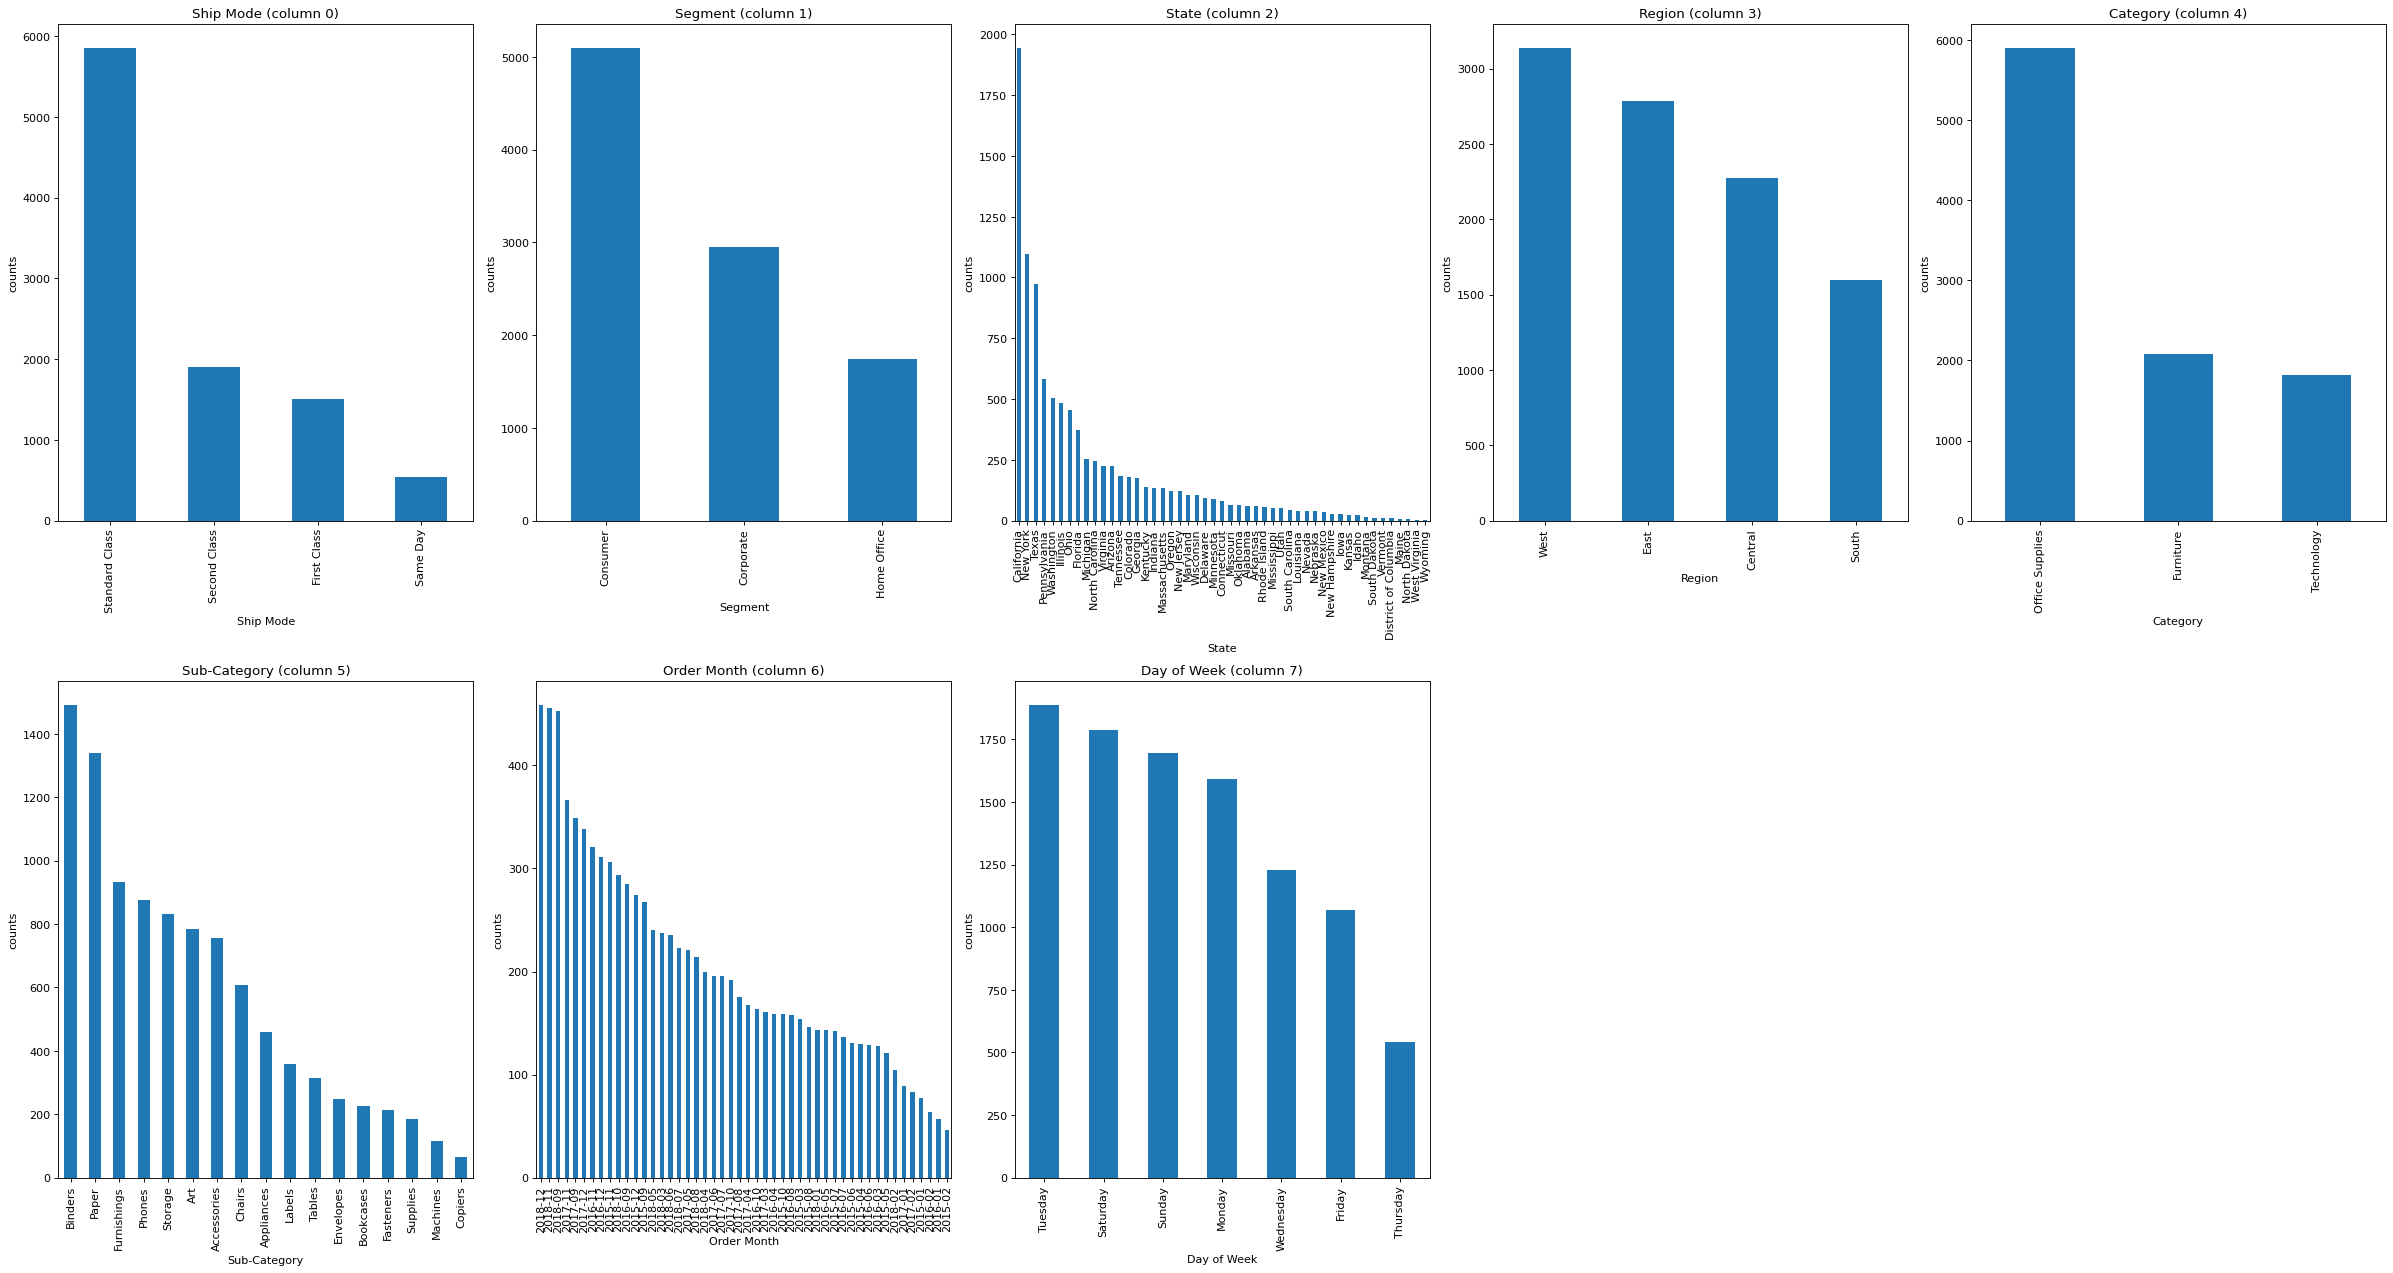

In [12]:
plotPerColumnDistribution(df, 10, 5)

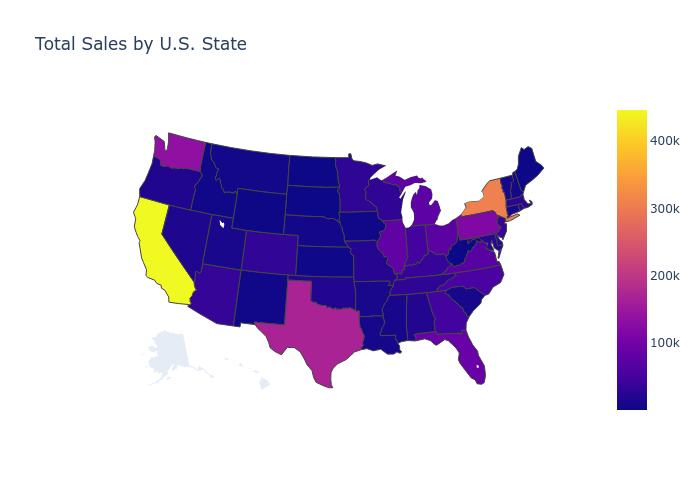

In [13]:
import plotly.graph_objects as go
from plotly.subplots import make_subplots

# Initialize Plotly in Jupyter Notebook mode
import plotly.io as pio
pio.renderers.default = "iframe"
#pio.renderers.default = 'notebook_connected'


# Create a mapping for all 50 states 
all_state_mapping = {
    "Alabama": "AL", "Alaska": "AK", "Arizona": "AZ", "Arkansas": "AR",
    "California": "CA", "Colorado": "CO", "Connecticut": "CT", "Delaware": "DE",
    "Florida": "FL", "Georgia": "GA", "Hawaii": "HI", "Idaho": "ID", "Illinois": "IL",
    "Indiana": "IN", "Iowa": "IA", "Kansas": "KS", "Kentucky": "KY", "Louisiana": "LA",
    "Maine": "ME", "Maryland": "MD", "Massachusetts": "MA", "Michigan": "MI", "Minnesota": "MN",
    "Mississippi": "MS", "Missouri": "MO", "Montana": "MT", "Nebraska": "NE", "Nevada": "NV",
    "New Hampshire": "NH", "New Jersey": "NJ", "New Mexico": "NM", "New York": "NY",
    "North Carolina": "NC", "North Dakota": "ND", "Ohio": "OH", "Oklahoma": "OK",
    "Oregon": "OR", "Pennsylvania": "PA", "Rhode Island": "RI", "South Carolina": "SC",
    "South Dakota": "SD", "Tennessee": "TN", "Texas": "TX", "Utah": "UT", "Vermont": "VT",
    "Virginia": "VA", "Washington": "WA", "West Virginia": "WV", "Wisconsin": "WI", "Wyoming": "WY"
}

# Add the Abbreviation column to the DataFrame
df['Abbreviation'] = df['State'].map(all_state_mapping)

# Group by state and calculate the sum of sales
sum_of_sales = df.groupby('State')['Sales'].sum().reset_index()

# Add Abbreviation to sum_of_sales
sum_of_sales['Abbreviation'] = sum_of_sales['State'].map(all_state_mapping)

# Create a choropleth map using Plotly
fig = go.Figure(data=go.Choropleth(
    locations=sum_of_sales['Abbreviation'],
    locationmode='USA-states',
    z=sum_of_sales['Sales'],
    hoverinfo='location+z',
    showscale=True
))

fig.update_geos(projection_type="albers usa")
fig.update_layout(
    geo_scope='usa',
    title='Total Sales by U.S. State'
)

fig.show("png")



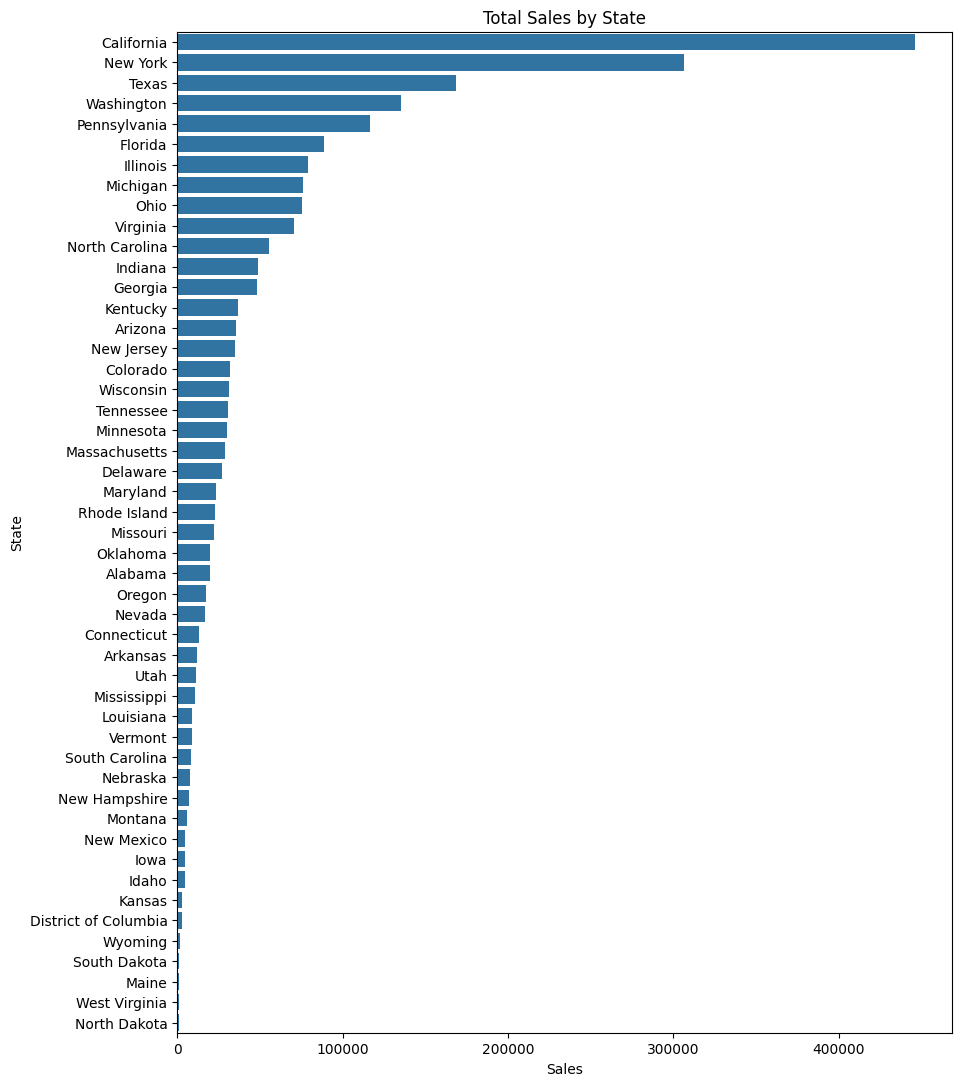

In [14]:
# Group by state and calculate the sum of sales
sum_of_sales = df.groupby('State')['Sales'].sum().reset_index()

# Sort the DataFrame by the 'Sales' column in descending order
sum_of_sales = sum_of_sales.sort_values(by='Sales', ascending=False)

# Create a horizontal bar graph
plt.figure(figsize=(10, 13))
ax = sns.barplot(x='Sales', y='State', data=sum_of_sales, errorbar=None)

plt.xlabel('Sales')
plt.ylabel('State')
plt.title('Total Sales by State')
plt.show()

/tmp/ipykernel_296750/1093268783.py:16: UserWarning:

FixedFormatter should only be used together with FixedLocator

/tmp/ipykernel_296750/1093268783.py:16: UserWarning:

FixedFormatter should only be used together with FixedLocator

/tmp/ipykernel_296750/1093268783.py:16: UserWarning:

FixedFormatter should only be used together with FixedLocator

/tmp/ipykernel_296750/1093268783.py:16: UserWarning:

FixedFormatter should only be used together with FixedLocator



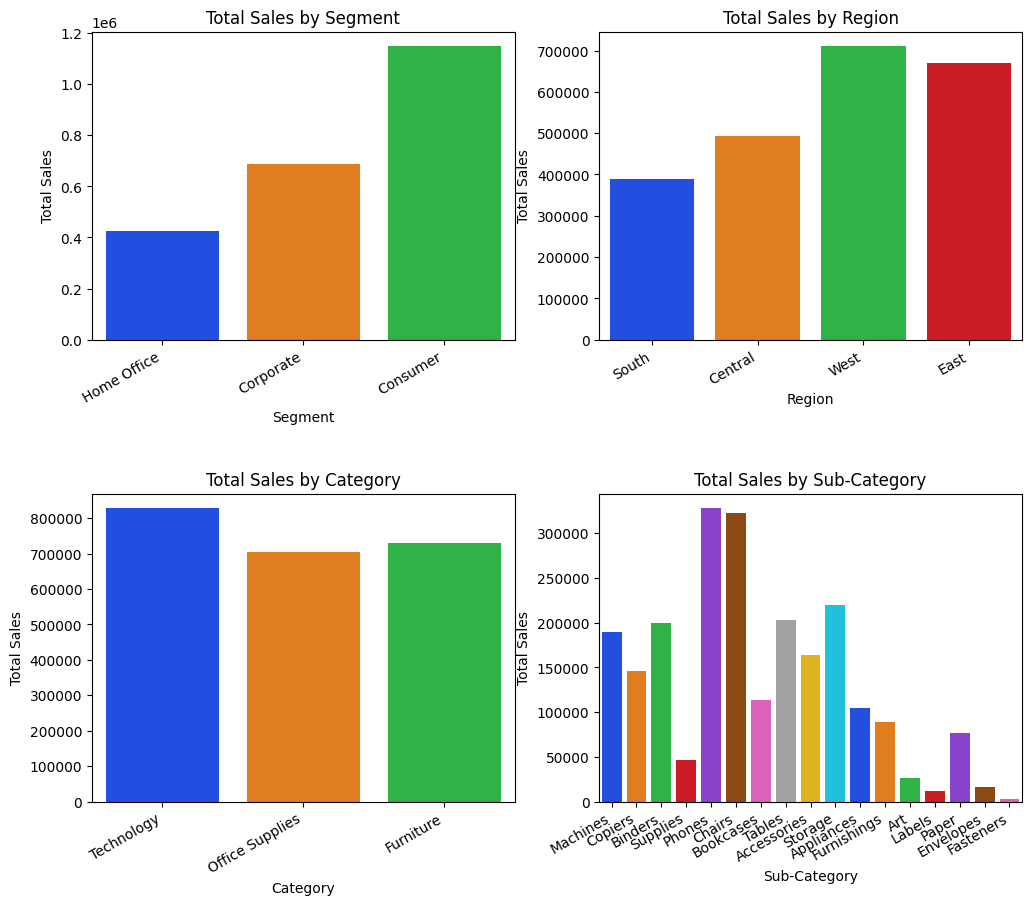

In [15]:
# Sort the DataFrame by 'Sales' in descending order
df = df.sort_values(by='Sales', ascending=False)

fig, axes = plt.subplots(2, 2, figsize=(12, 10))
fig.subplots_adjust(hspace=0.5)

# List of columns to plot
columns = ['Segment', 'Region', 'Category', 'Sub-Category']

# Create barplots for each column
for i, column in enumerate(columns):
    ax = axes[i // 2, i % 2]
    sns.barplot(x=column, y='Sales', hue=column, data=df, estimator=np.sum, errorbar=None, legend=False, palette='bright', ax=ax)
    ax.set_ylabel('Total Sales')
    ax.set_title(f'Total Sales by {column}')
    ax.set_xticklabels(ax.get_xticklabels(), rotation=30, ha='right')

# Display the plots
plt.show()

In [16]:
import plotly.express as px
# Summarize the Sales data by Category and Sub-Category
df_summary = df.groupby(['Category', 'Sub-Category'])['Sales'].sum().reset_index()
# Create a nested pie chart
fig = px.sunburst(
    df_summary,
    path=['Category', 'Sub-Category'],
    values='Sales',
)

fig.show()

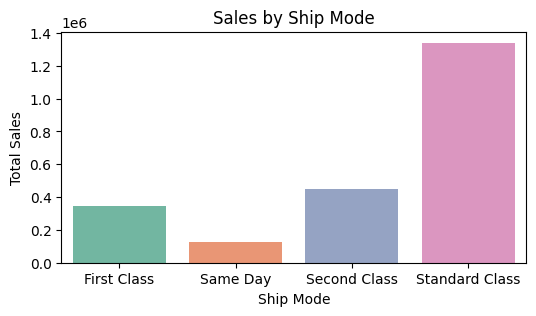

In [17]:
# Group by "Ship Mode" and calculate the sum of sales
sales_by_ship_mode = df.groupby("Ship Mode")["Sales"].sum().reset_index()

# Set a color palette
# Determine the number of unique values in "Ship Mode"
num_unique_ship_modes = sales_by_ship_mode["Ship Mode"].nunique()

# Set a color palette with the exact number of needed colors
colors = sns.color_palette("Set2", num_unique_ship_modes)

# Create a bar plot with different colors
plt.figure(figsize=(6, 3))
sns.barplot(x="Ship Mode", y="Sales", hue="Ship Mode", data=sales_by_ship_mode, legend=False, palette=colors)
plt.xlabel("Ship Mode")
plt.ylabel("Total Sales")
plt.title("Sales by Ship Mode")
plt.show()

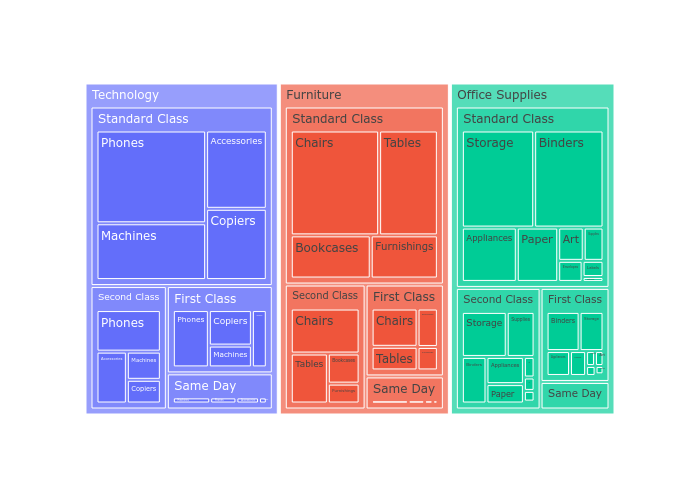

In [18]:
# Summarize the Sales data by Category, Ship Mode, and Sub-Category
df_summary = df.groupby(['Category', 'Ship Mode', 'Sub-Category'])['Sales'].sum().reset_index()

# Create a treemap
fig = px.treemap(
    df_summary,
    path=['Category', 'Ship Mode', 'Sub-Category'],
    values='Sales',
)

fig.show()
fig.show("png")

In [19]:
import scipy.stats as stats

# Example: Calculating Eta-Squared for 'Category' and 'Sales'
categories = df['Category'].unique()
groups = [df.where(df['Category']==cat)['Sales'].dropna() for cat in categories]

f_value, p_value = stats.f_oneway(*groups)

# Calculating Eta-Squared
eta_sq = f_value / (f_value + (len(categories) - 1))

print(f"ANOVA F-value: {f_value}, P-value: {p_value}, Eta-squared: {eta_sq}")

ANOVA F-value: 262.1646591215712, P-value: 1.2178144965918443e-111, Eta-squared: 0.9924289645456337


In [20]:
import scipy.stats as stats

categorical_columns = df.select_dtypes(include=['object', 'category']).columns
# Filter out columns with only one unique value
categorical_columns = [col for col in categorical_columns if df[col].nunique() > 1]
print(categorical_columns)


['Order ID', 'Ship Date', 'Ship Mode', 'Customer ID', 'Customer Name', 'Segment', 'City', 'State', 'Region', 'Product ID', 'Category', 'Sub-Category', 'Product Name', 'Day of Week', 'Abbreviation']


In [21]:

categorical_columns = ['Ship Mode', 'Segment', 'City', 'State', 'Region', 'Category', 'Sub-Category', 'Product Name']
anova_results = {}

for col in categorical_columns:
    #print(f"Processing {col}")
    grouped_data = [group['Sales'].values for name, group in df.groupby(col)]
    if len(grouped_data) > 1:
        anova_result = stats.f_oneway(*grouped_data)
        eta_squared = sum([g.var(ddof=1) for g in grouped_data]) / df['Sales'].var(ddof=len(grouped_data) - 1)
        anova_results[col] = {'F-value': anova_result.statistic, 'P-value': anova_result.pvalue, 'Eta-squared': eta_squared}
    else:
        print(f"Not enough groups in {col} for ANOVA")

# Display the results
for col, result in anova_results.items():
    print(f"{col}:\nF-value: {result['F-value']}\nP-value: {result['P-value']}\nEta-squared: {result['Eta-squared']}\n")

/tmp/ipykernel_296750/1035916516.py:9: RuntimeWarning:

Degrees of freedom <= 0 for slice

/root/jupyter/jupyterlab/venv/lib/python3.10/site-packages/numpy/core/_methods.py:257: RuntimeWarning:

invalid value encountered in double_scalars

/tmp/ipykernel_296750/1035916516.py:9: RuntimeWarning:

Degrees of freedom <= 0 for slice

/root/jupyter/jupyterlab/venv/lib/python3.10/site-packages/numpy/core/_methods.py:257: RuntimeWarning:

invalid value encountered in double_scalars



Ship Mode:
F-value: 0.07437771541761824
P-value: 0.9737696598907598
Eta-squared: 3.6725158480880027

Segment:
F-value: 0.5874032714436926
P-value: 0.5557881652680301
Eta-squared: 3.2819681244042638

City:
F-value: 0.6622411517655828
P-value: 0.9999999995144341
Eta-squared: nan

State:
F-value: 1.855201000606688
P-value: 0.0003071811723865261
Eta-squared: nan

Region:
F-value: 0.8974322307844994
P-value: 0.44157758889756793
Eta-squared: 4.276969062329237

Category:
F-value: 262.1646591215712
P-value: 1.2178144965918443e-111
Eta-squared: 4.191269238047662

Sub-Category:
F-value: 152.3312840331549
P-value: 0.0
Eta-squared: 53.237611617523605

Product Name:
F-value: 19.34157396765569
P-value: 0.0
Eta-squared: nan



/tmp/ipykernel_296750/1035916516.py:9: RuntimeWarning:

Degrees of freedom <= 0 for slice

/root/jupyter/jupyterlab/venv/lib/python3.10/site-packages/numpy/core/_methods.py:257: RuntimeWarning:

invalid value encountered in double_scalars



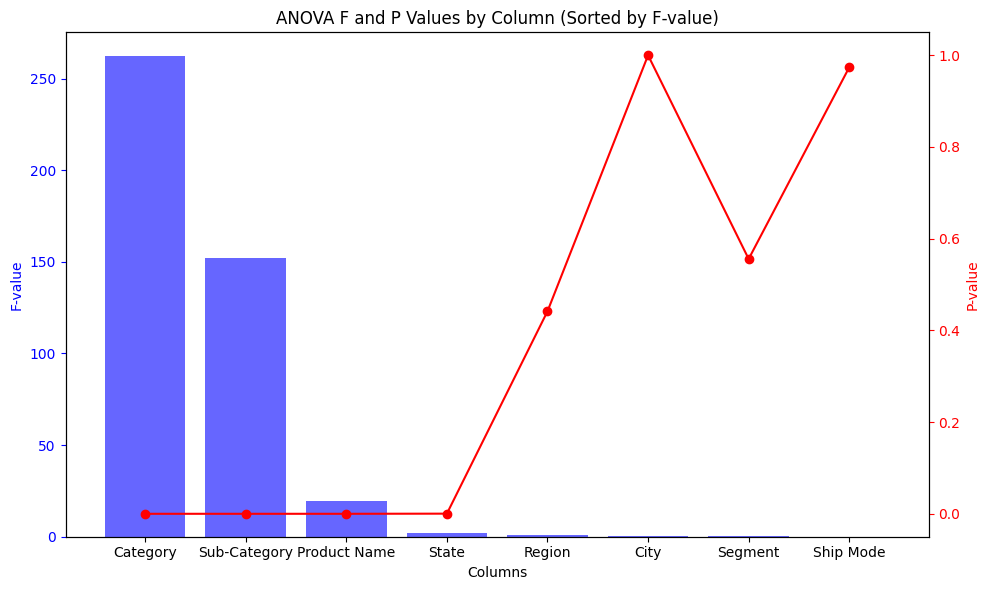

In [22]:
import matplotlib.pyplot as plt

# Assuming anova_results is a dictionary with columns as keys
# and each value is another dictionary with 'F-value' and 'P-value'

# Sort the columns by F-value in descending order
sorted_columns = sorted(anova_results, key=lambda x: anova_results[x]['F-value'], reverse=True)
sorted_f_values = [anova_results[col]['F-value'] for col in sorted_columns]
sorted_p_values = [anova_results[col]['P-value'] for col in sorted_columns]

fig, ax1 = plt.subplots(figsize=(10, 6))

# Bar plot for F-values
ax1.bar(sorted_columns, sorted_f_values, color='b', alpha=0.6, label='F-value')
ax1.set_xlabel('Columns')
ax1.set_ylabel('F-value', color='b')
ax1.tick_params('y', colors='b')

# Twin axis for P-values
ax2 = ax1.twinx()
ax2.plot(sorted_columns, sorted_p_values, color='r', marker='o', label='P-value')
ax2.set_ylabel('P-value', color='r')
ax2.tick_params('y', colors='r')

# Adding titles and layout adjustments
plt.title('ANOVA F and P Values by Column (Sorted by F-value)')
fig.tight_layout()

# Show the plot
plt.show()


In [30]:
from openpyxl import load_workbook
# Create a DataFrame
data = pd.DataFrame({
    'Column': sorted_columns,
    'F-value': sorted_f_values,
    'P-value': sorted_p_values
})
# Path to your Excel file
file_path = 'result.xlsx'

# Check if the file exists and is in .xlsx format
if os.path.exists(file_path) and file_path.endswith('.xlsx'):
    mode = 'a'  # Append if already exists
    if_sheet_exists = 'replace'  # Replace the sheet if it exists
else:
    mode = 'w'  # Create a new file if not exists
    if_sheet_exists = None  # Default behavior for new file

# Use ExcelWriter with the appropriate mode
with pd.ExcelWriter(file_path, engine='openpyxl', mode=mode, if_sheet_exists=if_sheet_exists) as writer:
    data.to_excel(writer, sheet_name='ANOVA', index=False)

In [ ]:
df['tax'] = df['Sales'] * 0.005  # 0.5% of Sales

np.random.seed(0)
df['profit'] = df['Sales'] * (0.05 + np.random.randint(1, 11, size=len(df)) / 50)

plotScatterMatrix(df.drop(columns='Row ID'), 20, 10)